<a href="https://colab.research.google.com/github/swagata87/IITKanpurPhy654/blob/main/Higgs_discovery_4l_invMass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The data we use here is actual, meaningful data from the CMS experiment that confirmed the existence of Higgs boson.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Data for later use.

csvs = [pd.read_csv('http://opendata.cern.ch/record/5200/files/4mu_2011.csv'), pd.read_csv('http://opendata.cern.ch/record/5200/files/4e_2011.csv'), pd.read_csv('http://opendata.cern.ch/record/5200/files/2e2mu_2011.csv')]
csvs += [pd.read_csv('http://opendata.cern.ch/record/5200/files/4mu_2012.csv'), pd.read_csv('http://opendata.cern.ch/record/5200/files/4e_2012.csv'), pd.read_csv('http://opendata.cern.ch/record/5200/files/2e2mu_2012.csv')]

fourlep = pd.concat(csvs)


According to the Standard Model of particle physics, one of the ways the Higgs boson can decay is H-->ZZ-->4 leptons.
But there are other standard model processes which can also produce such a final state.

In [3]:
fourlep.head()

,Run,Event,PID1,E1,px1,py1,pz1,pt1,eta1,phi1,...,px4,py4,pz4,pt4,eta4,phi4,Q4,mZ1,mZ2,M
0,173657,34442568,13,35.9978,32.7631,-4.41922,-14.2436,33.0598,-0.418519,-0.134075,...,-1.20978,11.35650,1.29029,11.42070,0.112739,1.676920,1,62.5513,20.5205,91.4517
1,166512,337493970,13,52.9826,-49.9170,8.17082,15.7696,50.5813,0.306925,2.979340,...,2.32913,-13.06840,27.14400,13.27430,1.463510,-1.394420,1,92.1352,90.2049,235.8800
2,171091,69105221,13,165.9750,-12.6280,-30.22890,162.7100,32.7605,2.305880,-1.966510,...,-8.09683,3.05681,23.28190,8.65464,1.715610,2.780600,-1,58.3874,14.3541,79.3858
3,172952,559839432,13,110.2600,-69.1510,68.83630,-51.3524,97.5720,-0.504613,2.358470,...,3.02072,8.34856,-4.13324,8.87824,-0.450186,1.223630,1,91.1877,37.3758,232.9290
4,167282,44166176,-13,54.3881,-27.4999,-43.86520,-16.6628,51.7726,-0.316533,-2.130770,...,4.64276,-2.38618,4.41465,5.22007,0.767963,-0.474752,-1,90.7513,14.7350,119.2900


In [4]:
# Let us set some values here in regards to the region we are looking at.

rmin = 70
rmax = 181
nbins = 37

M_hist = np.histogram(fourlep['M'], bins = nbins, range = (rmin,rmax))

hist, bins = M_hist
width = 1.0*(bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
print (width)

3.0


Let us look at some simulations from higgs and other processes which can give same final state of 4 leptons. Here are some simulated values for such events (weighted). Basically, we create a set of values that have some randomness in them, just like a real measurement would have, but which follows the distribution that has been observed in those processes.

In [5]:
dy = np.array([0,0,0,0,0,0.354797,0.177398,2.60481,0,0,0,0,0,0,0,0,0,0.177398,0.177398,0,0.177398,0,0,0,0,0,0,0,0,0,0,0,0.177398,0,0,0,0])
ttbar = np.array([0.00465086,0,0.00465086,0,0,0,0,0,0,0,0.00465086,0,0,0,0,0,0.00465086,0,0,0,0,0.00465086,0.00465086,0,0,0.0139526,0,0,0.00465086,0,0,0,0.00465086,0.00465086,0.0139526,0,0])
zz = np.array([0.181215,0.257161,0.44846,0.830071,1.80272,4.57354,13.9677,14.0178,4.10974,1.58934,0.989974,0.839775,0.887188,0.967021,1.07882,1.27942,1.36681,1.4333,1.45141,1.41572,1.51464,1.45026,1.47328,1.42899,1.38757,1.33561,1.3075,1.29831,1.31402,1.30672,1.36442,1.39256,1.43472,1.58321,1.85313,2.19304,2.95083])
hzz = np.array([0.00340992,0.00450225,0.00808944,0.0080008,0.00801578,0.0108945,0.00794274,0.00950757,0.0130648,0.0163568,0.0233832,0.0334813,0.0427229,0.0738129,0.13282,0.256384,0.648352,2.38742,4.87193,0.944299,0.155005,0.0374193,0.0138906,0.00630364,0.00419265,0.00358719,0.00122527,0.000885718,0.000590479,0.000885718,0.000797085,8.86337e-05,0.000501845,8.86337e-05,0.000546162,4.43168e-05,8.86337e-05])

In [6]:
len(dy)

37

In [7]:
len(ttbar)

37

In [8]:
len(zz)

37

In [9]:
len(hzz)

37

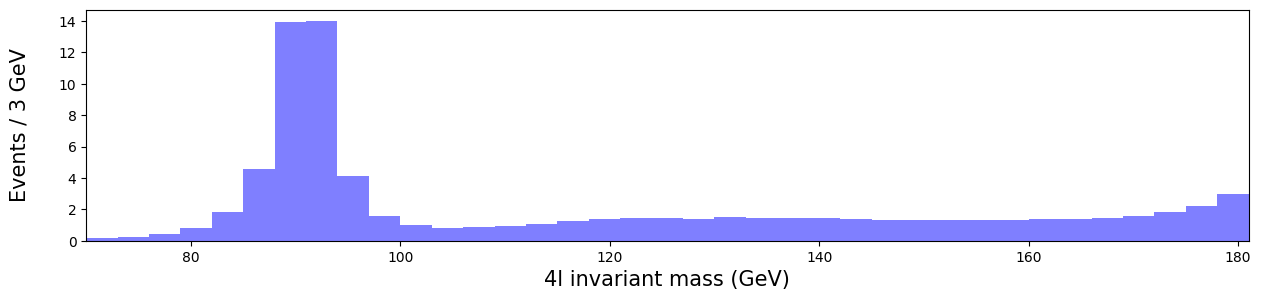

In [10]:
# ZZ

plt.figure(figsize = (15,3))
plt.bar(center, zz, align = 'center', width = width, color = 'b', linewidth = 0, edgecolor = 'black', alpha = 0.5)

plt.xlabel('4l invariant mass (GeV)', fontsize = 15)
plt.ylabel('Events / 3 GeV\n', fontsize = 15)
plt.xlim(rmin,rmax)
plt.show()


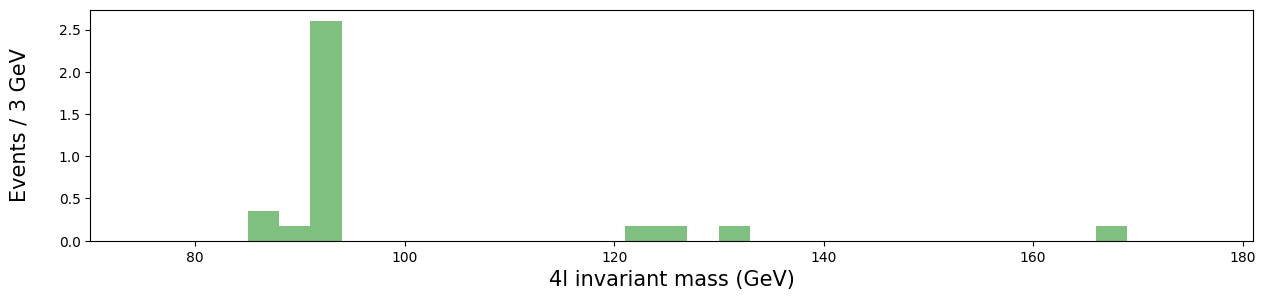

In [11]:
# DY

plt.figure(figsize = (15,3))
plt.bar(center, dy, align = 'center', width = width, color = 'g', linewidth = 0, edgecolor = 'black', alpha = 0.5)

plt.xlabel('4l invariant mass (GeV)', fontsize = 15)
plt.ylabel('Events / 3 GeV\n', fontsize = 15)
plt.xlim(rmin,rmax)
plt.show()

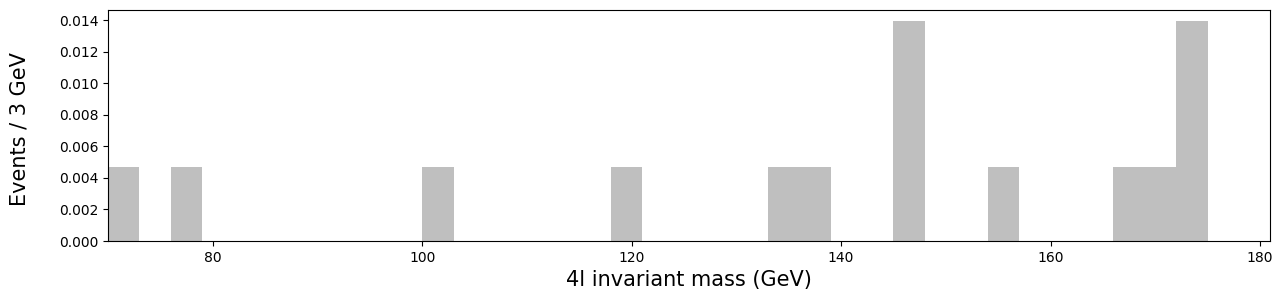

In [12]:
# ttbar

plt.figure(figsize = (15,3))
plt.bar(center, ttbar, align = 'center', width = width, color = 'gray', linewidth = 0, edgecolor = 'b', alpha = 0.5)

plt.xlabel('4l invariant mass (GeV)', fontsize = 15)
plt.ylabel('Events / 3 GeV \n', fontsize = 15)
plt.xlim(rmin,rmax)
plt.show()

Let us stack them together and see what kind of shape we might expect from the real data of the experiment.

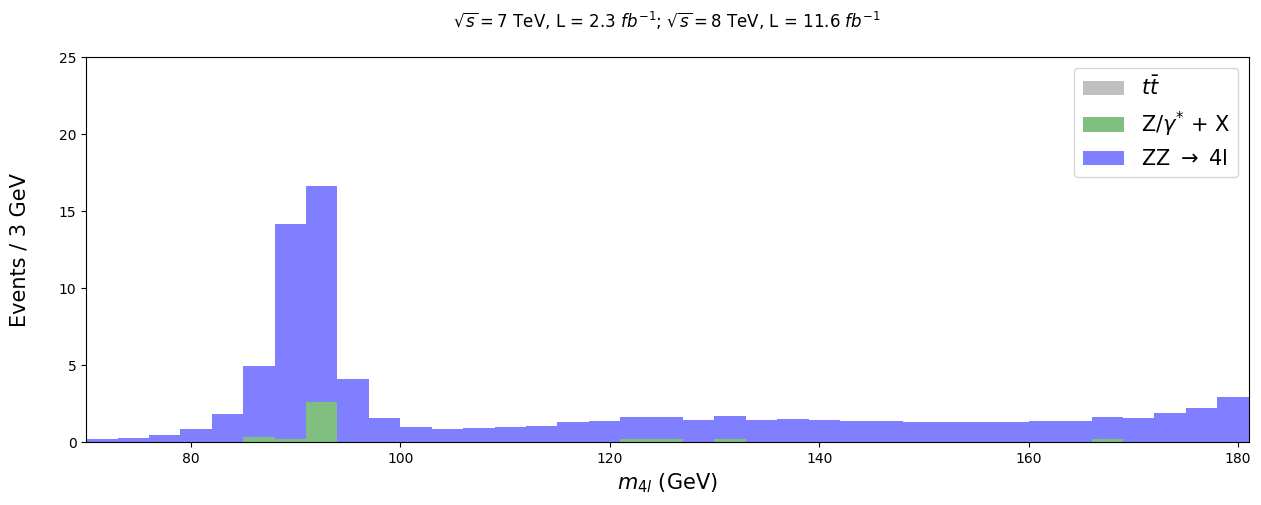

In [13]:
plt.figure(figsize = (15,5))

# ttbar
ttbar_bar = plt.bar(center, ttbar, align = 'center', width = width, color = 'gray', linewidth = 0, edgecolor = 'b',
                    alpha = 0.5, label = r'$t\bar{t}$')

# DY
dy_bar = plt.bar(center, dy, align = 'center', width = width, color = 'g', linewidth = 0, edgecolor = 'black',
                 alpha = 0.5, bottom = ttbar, label = 'Z/$\gamma^{*}$ + X')

# ZZ
zz_bar = plt.bar(center, zz, align = 'center', width = width, color = 'b', linewidth = 0, edgecolor = 'black',
                 alpha = 0.5, bottom = ttbar+dy, label = r'ZZ $\rightarrow$ 4l')

plt.title('$ \sqrt{s} = 7$ TeV, L = 2.3 $fb^{-1}$; $\sqrt{s} = 8$ TeV, L = 11.6 $fb^{-1}$ \n', fontsize = 12)
plt.xlabel('$m_{4l}$ (GeV)', fontsize = 15)
plt.ylabel('Events / 3 GeV\n', fontsize = 15)
plt.ylim(0,25)
plt.xlim(rmin,rmax)
plt.legend(fontsize = 15)

plt.show()

Let us add our measured data on top of that. How well do they line up?

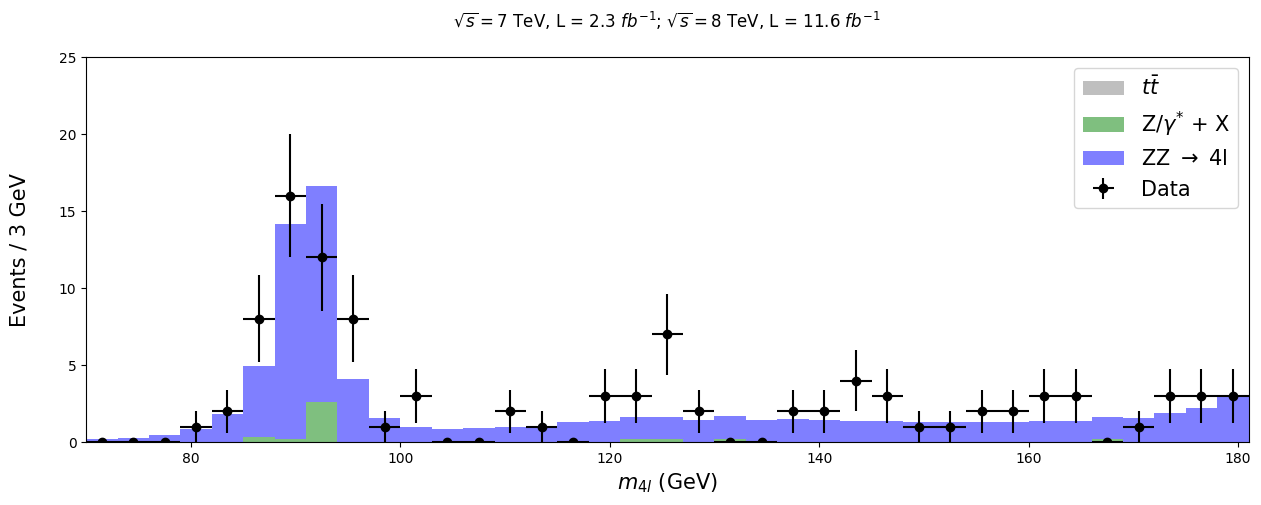

In [14]:
plt.figure(figsize = (15,5))

xerrs = [width*0.5 for i in range(0, nbins)]
yerrs = np.sqrt(hist)

# ttbar
ttbar_bar = plt.bar(center, ttbar, align = 'center', width = width, color = 'gray', linewidth = 0, edgecolor = 'b',
                    alpha = 0.5, label = r'$t\bar{t}$')

# DY
dy_bar = plt.bar(center, dy, align = 'center', width = width, color = 'g', linewidth = 0, edgecolor = 'black',
                 alpha = 0.5, bottom = ttbar, label = 'Z/$\gamma^{*}$ + X')

# ZZ
zz_bar = plt.bar(center, zz, align = 'center', width = width, color = 'b', linewidth = 0, edgecolor = 'black',
                 alpha = 0.5, bottom = ttbar+dy, label = r'ZZ $\rightarrow$ 4l')

# Measured data
data_bar = plt.errorbar(center, hist, xerr = xerrs, yerr = yerrs, linestyle = 'None', color = 'black',
                        marker = 'o', label = 'Data')

plt.title('$ \sqrt{s} = 7$ TeV, L = 2.3 $fb^{-1}$; $\sqrt{s} = 8$ TeV, L = 11.6 $fb^{-1}$ \n', fontsize = 12)
plt.xlabel('$m_{4l}$ (GeV)', fontsize = 15)
plt.ylabel('Events / 3 GeV\n', fontsize = 15)
plt.ylim(0,25)
plt.xlim(rmin,rmax)
plt.legend(fontsize = 15)

plt.show()


There are clearly some points in there that do not seem to arise in our simulated processes. For comparison purposes, physicists made simulations for Higgs at varying masses, one of which is shown here. This graph shows us what the Higgs boson should look like, if it had a mass of 125 GeV.

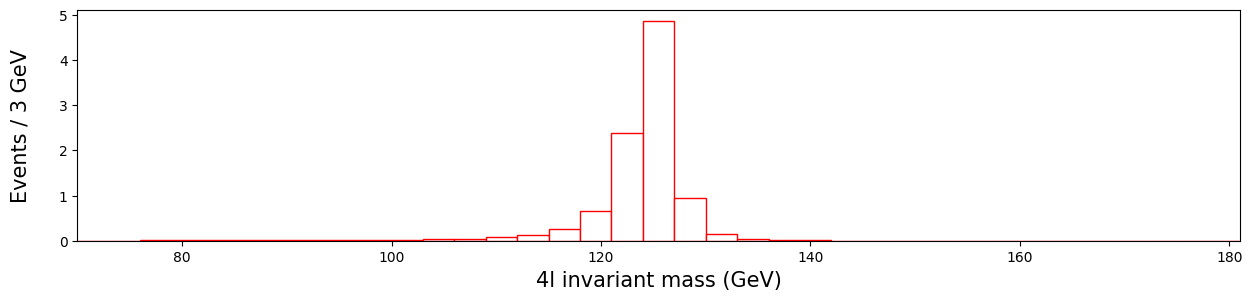

In [15]:
# HZZ, our theoretical assumption of a Higgs via two Z bosons.

plt.figure(figsize = (15,3))
plt.bar(center, hzz, align = 'center', width = width, color = 'w', linewidth = 1, edgecolor = 'r')

plt.xlabel('4l invariant mass (GeV)', fontsize = 15)
plt.ylabel('Events / 3 GeV\n', fontsize = 15)
plt.xlim(rmin,rmax)
plt.show()

Bonus question: how can something, that seems to have a mass of roughly 125 GeV decay via two Z bosons, with mass over 90 GeV?

Add that in the previous graph and see how it lines up.

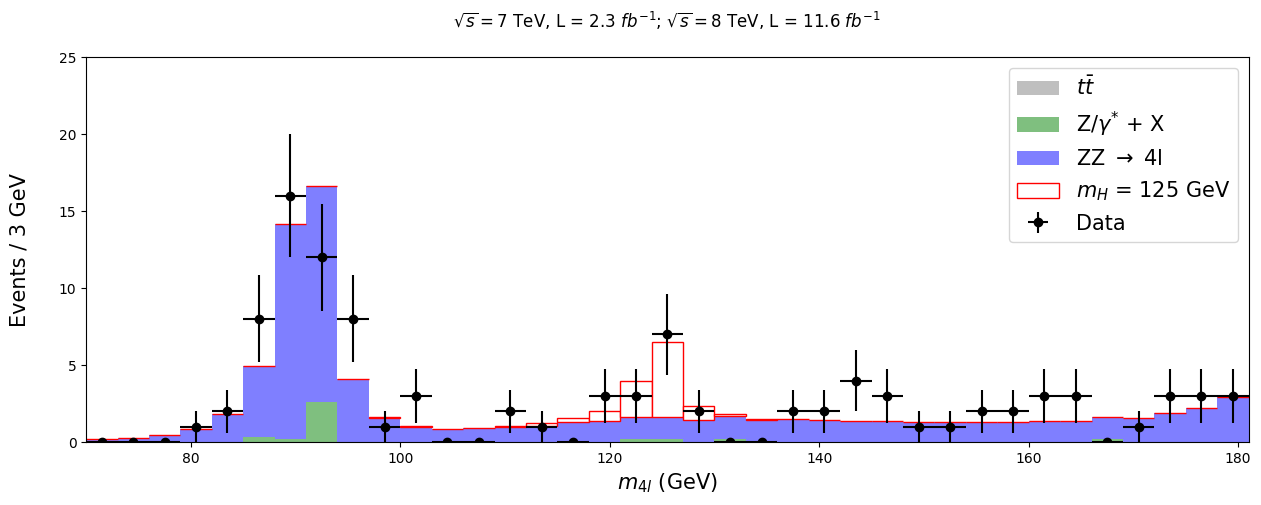

In [16]:
plt.figure(figsize = (15,5))

# ttbar
ttbar_bar = plt.bar(center, ttbar, align = 'center', width = width, color = 'gray', linewidth = 0, edgecolor = 'b',
                    alpha = 0.5, label = r'$t\bar{t}$')

# DY
dy_bar = plt.bar(center, dy, align = 'center', width = width, color = 'g', linewidth = 0, edgecolor = 'black',
                 alpha = 0.5, bottom = ttbar, label = 'Z/$\gamma^{*}$ + X')

# ZZ
zz_bar = plt.bar(center, zz, align = 'center', width = width, color = 'b', linewidth = 0, edgecolor = 'black',
                 alpha = 0.5, bottom = ttbar+dy, label = r'ZZ $\rightarrow$ 4l')

# HZZ
hzz_bar = plt.bar(center, hzz, align = 'center', width = width, color = 'w', linewidth = 1, edgecolor = 'r',
                  bottom = ttbar+dy+zz, label = '$m_{H}$ = 125 GeV')

# Measured data
data_bar = plt.errorbar(center, hist, xerr = xerrs, yerr = yerrs, linestyle = 'None', color = 'black',
                        marker = 'o', label = 'Data')

plt.title('$ \sqrt{s} = 7$ TeV, L = 2.3 $fb^{-1}$; $\sqrt{s} = 8$ TeV, L = 11.6 $fb^{-1}$ \n', fontsize = 12)
plt.xlabel('$m_{4l}$ (GeV)', fontsize = 15)
plt.ylabel('Events / 3 GeV\n', fontsize = 15)
plt.ylim(0,25)
plt.xlim(rmin,rmax)
plt.legend(fontsize = 15)

plt.show()


As we can see, there is certainly some interesting activity going on in the 125 GeV region. Our plot but is not too far off from actual analysis results. The most telling differences mainly arise from our somewhat rough methods compared to the more sophisticated ones used at CMS.

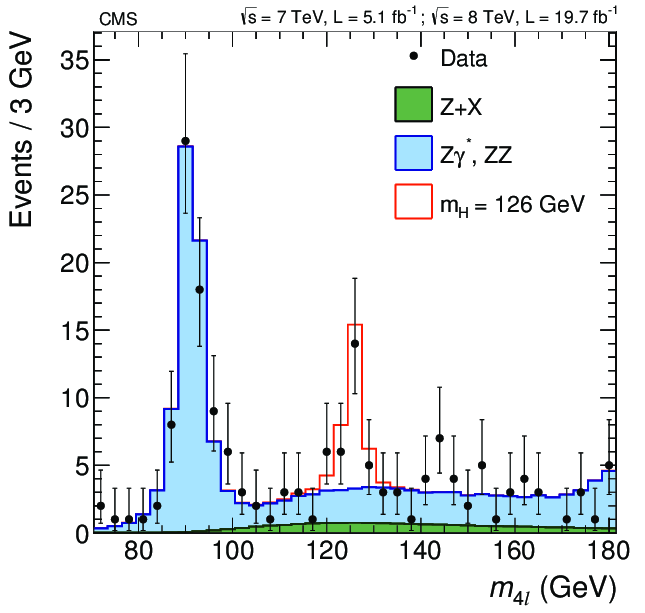